# Rede Perceptron de Múltiplas Camadas
&nbsp;

**Questão 2** - Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as duas
funções abaixo. Em seguida, compare os resultados com as curvas exatas. No caso da letra
(b), apresente também a curva do erro médio de treinamento com relação ao número de
épocas e a curva do erro médio com o conjunto de validação.

**a)** Função lógica XOR <br>
**b)** _f(x) = sen(πx) / πx_ , 0 ≤ x ≤ 4
&nbsp;

### b) _f(x) = sen(πx) / πx_ , 0 ≤ x ≤ 4

In [1]:
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from data_generator_b import generator

In [2]:
X, y = generator(2000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [3]:
ann = Sequential()

In [4]:
ann.add(Dense(10, input_shape=(1,), activation='relu'))
ann.add(Dense(5, activation='relu'))
ann.add(Dense(1, activation='linear'))

In [5]:
ann.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
history = ann.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=2)

Epoch 1/100
20/20 - 0s - loss: 0.6220 - mean_squared_error: 0.4532 - val_loss: 0.5819 - val_mean_squared_error: 0.3941
Epoch 2/100
20/20 - 0s - loss: 0.5327 - mean_squared_error: 0.3408 - val_loss: 0.4899 - val_mean_squared_error: 0.2917
Epoch 3/100
20/20 - 0s - loss: 0.4486 - mean_squared_error: 0.2597 - val_loss: 0.4014 - val_mean_squared_error: 0.2163
Epoch 4/100
20/20 - 0s - loss: 0.3669 - mean_squared_error: 0.2019 - val_loss: 0.3152 - val_mean_squared_error: 0.1634
Epoch 5/100
20/20 - 0s - loss: 0.2895 - mean_squared_error: 0.1631 - val_loss: 0.2467 - val_mean_squared_error: 0.1327
Epoch 6/100
20/20 - 0s - loss: 0.2490 - mean_squared_error: 0.1444 - val_loss: 0.2220 - val_mean_squared_error: 0.1208
Epoch 7/100
20/20 - 0s - loss: 0.2364 - mean_squared_error: 0.1371 - val_loss: 0.2128 - val_mean_squared_error: 0.1152
Epoch 8/100
20/20 - 0s - loss: 0.2300 - mean_squared_error: 0.1317 - val_loss: 0.2088 - val_mean_squared_error: 0.1108
Epoch 9/100
20/20 - 0s - loss: 0.2259 - mean_squ

Epoch 70/100
20/20 - 0s - loss: 0.0662 - mean_squared_error: 0.0080 - val_loss: 0.0696 - val_mean_squared_error: 0.0084
Epoch 71/100
20/20 - 0s - loss: 0.0662 - mean_squared_error: 0.0080 - val_loss: 0.0695 - val_mean_squared_error: 0.0084
Epoch 72/100
20/20 - 0s - loss: 0.0661 - mean_squared_error: 0.0080 - val_loss: 0.0695 - val_mean_squared_error: 0.0084
Epoch 73/100
20/20 - 0s - loss: 0.0661 - mean_squared_error: 0.0080 - val_loss: 0.0695 - val_mean_squared_error: 0.0084
Epoch 74/100
20/20 - 0s - loss: 0.0661 - mean_squared_error: 0.0080 - val_loss: 0.0694 - val_mean_squared_error: 0.0084
Epoch 75/100
20/20 - 0s - loss: 0.0662 - mean_squared_error: 0.0079 - val_loss: 0.0695 - val_mean_squared_error: 0.0084
Epoch 76/100
20/20 - 0s - loss: 0.0662 - mean_squared_error: 0.0080 - val_loss: 0.0695 - val_mean_squared_error: 0.0084
Epoch 77/100
20/20 - 0s - loss: 0.0661 - mean_squared_error: 0.0080 - val_loss: 0.0695 - val_mean_squared_error: 0.0084
Epoch 78/100
20/20 - 0s - loss: 0.0661 -

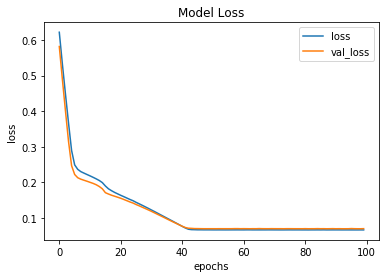

In [11]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

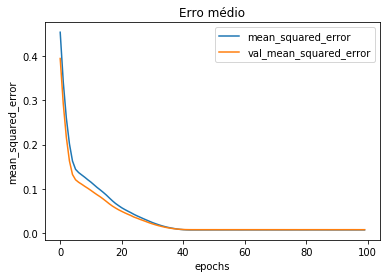

In [9]:
plt.plot(history.history["mean_squared_error"], label="mean_squared_error")
plt.plot(history.history["val_mean_squared_error"], label="val_mean_squared_error")
plt.title('Erro médio')
plt.ylabel('mean_squared_error')
plt.xlabel('epochs')
plt.legend()

In [7]:
y_pred = ann.predict(X_test)
print(f'Score: {round(r2_score(y_test, y_pred)*100,2)}%')

Score: 93.06%
